# Goal

* Use `phytools` package to create contMaps of host metadata

# Var

In [2]:
work_dir = '/ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map/'

# phyloseq
physeq_IndD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq//physeq_IndD.RDS'
physeq_SpecD_file = '/ebio/abt3_projects/Georg_animal_feces/data/16S/LLA/phyloseq//physeq_SpecD.RDS'

# host cladogram
clado_file = '/ebio/abt3_projects/Georg_animal_feces/data/animal/phylogeny/cladogram//unified_metadata_20171206_r5k_SpecD-rn.nwk'

# Init

In [3]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(ape)
library(phyloseq)
library(phytools)
source('/ebio/abt3_projects/Georg_animal_feces/code/init.R') 


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“replacing previous import ‘stats::sd’ by ‘BiocGenerics::sd’ when loading ‘S4Vectors’”Warning message:
“replacing previous import ‘stats::var’ by ‘BiocGenerics::var’ when loading ‘S4Vectors’”Warning message:
“multiple methods tables found for ‘var’”Warning message:
“multiple methods tables found for ‘sd’”Warning message:
“multiple methods tables found for ‘rowSums’”Warning message:
“multiple methods tables found for ‘colSums’”Warning message:
“multiple methods tables found for ‘rowMeans’”Warning message:
“multiple methods tables found for ‘colMeans’”Warning message:
“replacing previous import ‘BiocGenerics::rowSums’ by ‘S4Vectors::rowSums’ when loading ‘Biostrings’”Warning message:
“replacing previous import ‘BiocGenerics::var’ by ‘S4Vectors::var’ when loading ‘Biostrings’”W

In [4]:
make_dir(work_dir)
setwd(work_dir)

Directory already exists: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map/ 


# Load

In [59]:
physeq = readRDS(physeq_IndD_file) %>%
    transform_sample_counts(function(x) x / sum(x))
 
physeq %>% otu_table %>% colSums %>% summary %>% print
physeq

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 31209 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 100 sample variables ]
tax_table()   Taxonomy Table:    [ 31209 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 31209 tips and 30658 internal nodes ]

In [18]:
# metadata
metadata = physeq %>% 
    sample_data %>% 
    as.matrix %>% 
    as.data.frame %>%
    mutate(SampleID = gsub('^X([0-9])', '\\1', rownames(.)),
           SpecD_ID = gsub('^[A-Z]*[0-9]+b*\\.', '', SampleID))

metadata %>% status

Warning message in as.matrix.data.frame(.):
“Setting class(x) to NULL;   result will no longer be an S4 object”

[1] 221 102


BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subj_id,host_common_name,scientific_name,scientific_name_subspecies,⋯,Ct_B_2,Amount_SYBR_copies_in_5_ul_A_2,Amount_SYBR_copies_in_5_ul_B_2,Amount_geometric_mean_SYBR_2,Copies_in_5_ul_PCR_template_2,Copies_per_100_ul_extract_2,wellplate_Illumina,wellplate_position_Illumina,SampleID,SpecD_ID
ACTCACGGTATG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0049,1,1,Eurasian.Beaver,Castor fiber,NA,⋯,NA,NA,NA,NA,NA,NA,2,B12,1.Eurasian.Beaver,Eurasian.Beaver
ACGACGTCTTAG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0030,101,101,Horse,Equus caballus,NA,⋯,NA,2.130E+8X,NA,NA,3.41e+09,6.82e+10,4,E8,101.Horse,Horse
ACGAGTGCTATC,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0031,102,102,Kulan,Equus hemionus,Equus hemionus kulan,⋯,NA,6.820E+6X,NA,NA,1.09e+08,2.18e+09,4,E9,102.Kulan,Kulan


In [19]:
# host cladogram
host_clado = read.tree(clado_file)
host_clado


Phylogenetic tree with 131 tips and 58 internal nodes.

Tip labels:
	Eurasian.Beaver, Alpine.Marmot, Eurasian.Red.Squirrel, European.Ground.Squirrel, Long.tailed.Field.Mouse, Yellow.necked.Field.Mouse, ...

Unrooted; includes branch lengths.

# Formatting

In [20]:
# checking overlap
intersect(metadata$SpecD_ID %>% unique, host_clado$tip.label) %>% length %>% print

[1] 131


In [24]:
# filtering metadata
metadata_f = metadata %>%
    filter(SpecD_ID %in% as.vector(host_clado$tip.label))

metadata_f %>% status

[1] 211 102


BarcodeSequence,LinkerPrimerSequence,Primer,ReversePrimer,Barcode_ID,sample_number,host_subj_id,host_common_name,scientific_name,scientific_name_subspecies,⋯,Ct_B_2,Amount_SYBR_copies_in_5_ul_A_2,Amount_SYBR_copies_in_5_ul_B_2,Amount_geometric_mean_SYBR_2,Copies_in_5_ul_PCR_template_2,Copies_per_100_ul_extract_2,wellplate_Illumina,wellplate_position_Illumina,SampleID,SpecD_ID
ACTCACGGTATG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0049,1,1,Eurasian.Beaver,Castor fiber,NA,⋯,NA,NA,NA,NA,NA,NA,2,B12,1.Eurasian.Beaver,Eurasian.Beaver
ACTGTCGAAGCT,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0057,109,109,Red.Fox,Vulpes vulpes,NA,⋯,NA,2.340E+7X,NA,NA,3.74e+08,7.49e+09,4,F2,109.Red.Fox,Red.Fox
AATCGTGACTCG,CATGCTGCCTCCCGTAGGAGT,GCCTCCCTCGCGCCATCAG,AGAGTTTGATCCTGGCTCAG,338R_BC0007,110,110,Noctule,Nyctalus noctula,NA,⋯,NA,5.490E+5X,NA,NA,8.78e+06,1.76e+08,1,C7,110.Noctule,Noctule


# contMap plots

In [46]:
metadata_f %>% colnames %>% sort

[1] "age"                            "all_wild_individuals"          
  [3] "Amount_geometric_mean_SYBR"     "Amount_geometric_mean_SYBR_2"  
  [5] "Amount_SYBR_copies_in_5_ul_A"   "Amount_SYBR_copies_in_5_ul_A_2"
  [7] "Amount_SYBR_copies_in_5_ul_B"   "Amount_SYBR_copies_in_5_ul_B_2"
  [9] "Barcode_ID"                     "BarcodeSequence"               
 [11] "biome"                          "body_habitat"                  
 [13] "body_product"                   "captive_origin"                
 [15] "captive_wild_animal"            "captive_wild_comparison"       
 [17] "class"                          "collection_date"               
 [19] "Copies_in_5_ul_PCR_template"    "Copies_in_5_ul_PCR_template_2" 
 [21] "Copies_per_100_ul_extract_2"    "country"                       
 [23] "Ct_A"                           "Ct_A_2"                        
 [25] "Ct_B"                           "Ct_B_2"                        
 [27] "diet"                           "diet_breadth"                  
 [29] "diet_detail"                    "diet_flowers_nectar_pollen"    
 [31] "diet_fruit"                     "diet_grass_waterplants"        
 [33] "diet_invertebrate"              "diet_leaves_branches_bark_buds"
 [35] "diet_roots_tubers"              "diet_seeds"                    
 [37] "diet_vertebrate"                "digestive_system"              
 [39] "digestive_system_detail"        "dilution_qPCR"                 
 [41] "disease_stat"                   "duplicates_common_name"        
 [43] "duplicates_group"               "elev"                          
 [45] "extr_mass_g"                    "family"                        
 [47] "feeding_style"                  "freezing_date"                 
 [49] "genus"                          "geo_feature"                   
 [51] "geo_feature_detail_1"           "geo_feature_detail_2"          
 [53] "geo_feature_detail_3"           "geo_feature_detail_4"          
 [55] "geo_loc_name"                   "habitat"                       
 [57] "habitat_detail"                 "habitat_detail_1"              
 [59] "habitat_detail_2"               "height_or_length"              
 [61] "host_body_temp"                 "host_common_name"              
 [63] "host_subj_id"                   "host_taxid"                    
 [65] "indiv_variability"              "last_meal_or_actual_feed"      
 [67] "latitude"                       "LinkerPrimerSequence"          
 [69] "location"                       "location_detail"               
 [71] "longitude"                      "medication"                    
 [73] "Nanodrop_ng_per_ul_DNA"         "one_per_species"               
 [75] "order"                          "PCR_dil_qPCR_2"                
 [77] "Picogreen_ng_ul"                "population_species"            
 [79] "pregnant_animal"                "Primer"                        
 [81] "pseudoruminants"                "region"                        
 [83] "ReversePrimer"                  "ruminant"                      
 [85] "samp_collect_device"            "samp_store_temp"               
 [87] "sample_number"                  "sample_type"                   
 [89] "SampleID"                       "sampling_method"               
 [91] "scientific_name"                "scientific_name_subspecies"    
 [93] "season"                         "sex"                           
 [95] "SpecD_ID"                       "temp_regulation"               
 [97] "tot_mass"                       "two_per_species"               
 [99] "wellplate_Illumina"             "wellplate_position_Illumina"   
[101] "wild_domesticated_species"      "zoo_park_aquarium"

## Diet

In [29]:
metadata_f_s = metadata_f %>%
    mutate(diet = diet %>% as.character %>% as.factor %>% as.numeric) %>%
    group_by(SpecD_ID) %>%
    summarize(diet = mean(diet)) %>%
    ungroup()

trait = metadata_f_s$diet 
names(trait) = metadata_f_s$SpecD_ID %>% as.character %>% as.vector
trait %>% length %>% print
trait %>% summary

[1] 131


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   2.000   2.008   3.000   4.000 

In [42]:
metadata_f$diet %>% table

.
 carnivore  herbivore   omnivore specialist 
        58         87         59          7 

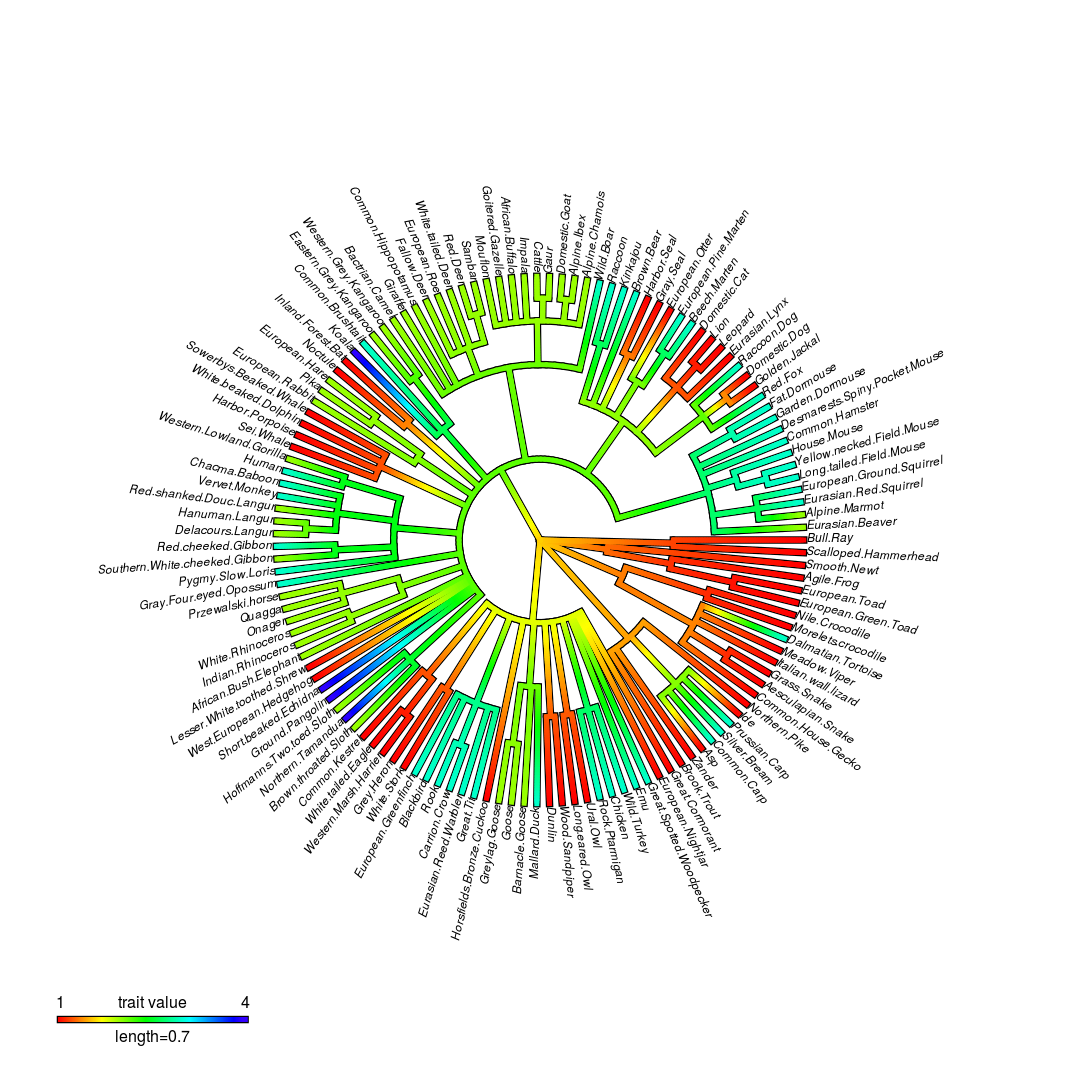

In [30]:
options(repr.plot.width=9, repr.plot.height=9)
obj = contMap(host_clado, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_clado)), fsize=c(0.6,0.8))

## Diet breadth

In [32]:
metadata_f_s = metadata_f %>%
    mutate(diet_breadth = diet_breadth %>% as.Num) %>%
    group_by(SpecD_ID) %>%
    summarize(diet_breadth = mean(diet_breadth)) %>%
    ungroup()

trait = metadata_f_s$diet_breadth 
names(trait) = metadata_f_s$SpecD_ID %>% as.character %>% as.vector
trait %>% length %>% print
trait %>% summary

[1] 131


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   2.000   2.763   4.000   8.000 

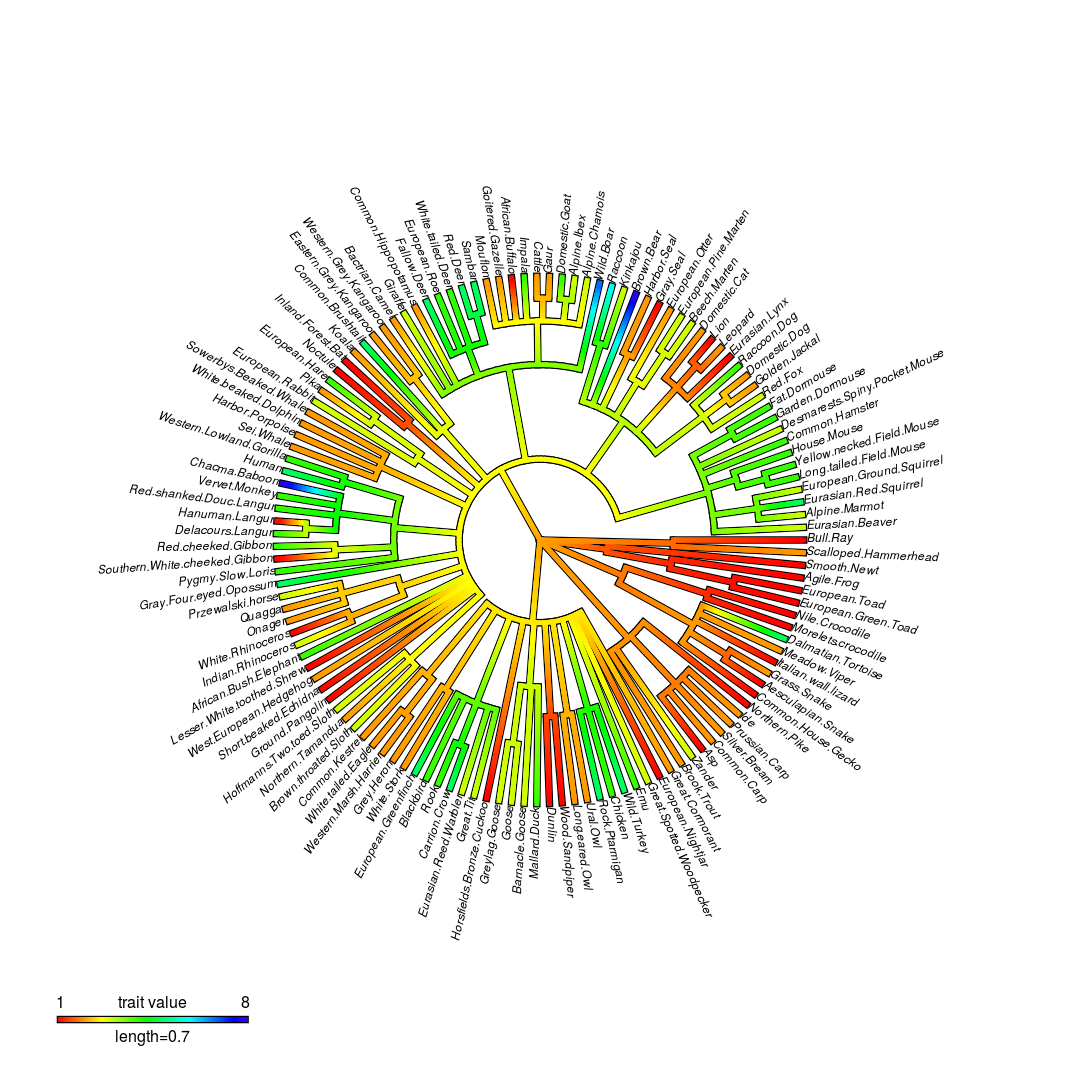

In [33]:
options(repr.plot.width=9, repr.plot.height=9)
obj = contMap(host_clado, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_clado)), fsize=c(0.6,0.8))

## Habitat

In [43]:
metadata_f_s = metadata_f %>%
    mutate(habitat = habitat %>% as.character %>% as.factor %>% as.numeric) %>%
    group_by(SpecD_ID) %>%
    summarize(habitat = mean(habitat)) %>%
    ungroup()

trait = metadata_f_s$habitat
names(trait) = metadata_f_s$SpecD_ID %>% as.character %>% as.vector
trait %>% length %>% print
trait %>% summary

[1] 131


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.500   4.000   4.000   3.771   4.000   4.000 

In [44]:
metadata_f$habitat %>% table

.
                      anthropogenic habitat       aquatic habitat 
                    1                    11                    18 
  terrestrial habitat 
                  181 

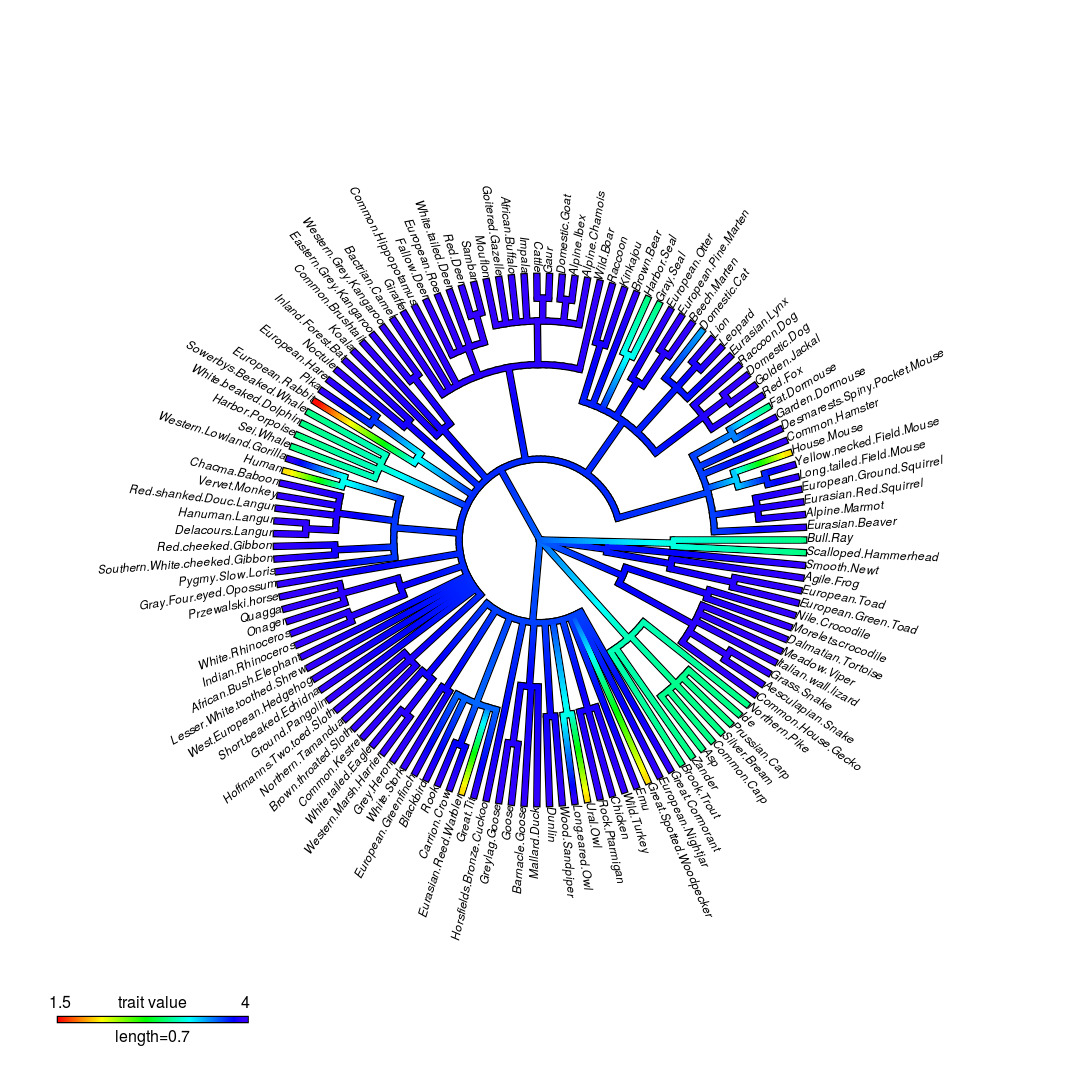

In [45]:
options(repr.plot.width=9, repr.plot.height=9)
obj = contMap(host_clado, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_clado)), fsize=c(0.6,0.8))

## Methanogen abundance

In [60]:
meth_tax = physeq %>%
    tax_table %>%
    as.matrix %>% as.data.frame %>%
    mutate(OTU = rownames(.)) %>%
    filter(grepl('^Methano', Order)) 

meth_tax$Order %>% as.vector %>% table %>% print
meth_tax %>% status

.
Methanobacteriales Methanomicrobiales  Methanosarcinales 
                81                 27                  1 
[1] 109   8


Domain,Phylum,Class,Order,Family,Genus,Species,OTU
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,287426f687c4ef3881c675cb448451b6
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,uncultured methanogenic archaeon,68edfdfbdea9e3aa8c4885512b23825b
Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,unclassified,7bcd951ae10ab80fb6f900c2683e6e07


In [61]:
physeq_meth = prune_taxa(meth_tax$OTU, physeq)
physeq_meth

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 109 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 100 sample variables ]
tax_table()   Taxonomy Table:    [ 109 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 109 tips and 108 internal nodes ]

In [64]:
# summing by genus
physeq_meth_genus = tax_glom(physeq_meth, taxrank='Genus')
physeq_meth_genus

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 5 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 100 sample variables ]
tax_table()   Taxonomy Table:    [ 5 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 5 tips and 4 internal nodes ]

In [67]:
# summing by domain
physeq_meth_domain = tax_glom(physeq_meth, taxrank='Domain')
physeq_meth_domain

Warning message in FUN(X[[i]], ...):
“merge_taxa attempted to reduce tree to 1 or fewer tips.
 tree replaced with NULL.”

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1 taxa and 221 samples ]
sample_data() Sample Data:       [ 221 samples by 100 sample variables ]
tax_table()   Taxonomy Table:    [ 1 taxa by 7 taxonomic ranks ]

In [75]:
otu = physeq_meth_domain %>%
    otu_table %>%
    as.matrix %>% as.data.frame %>%
    t %>% as.data.frame %>%
    mutate(SampleID = rownames(.),
           SampleID = gsub('^X([0-9])', '\\1', rownames(.)),
           SpecD_ID = gsub('^[A-Z]*[0-9]+b*\\.', '', SampleID))

colnames(otu)[1] = 'Abundance'
otu %>% status

[1] 221   3


Abundance,SampleID,SpecD_ID
0.0000,1.Eurasian.Beaver,Eurasian.Beaver
0.0050,101.Horse,Horse
0.0026,102.Kulan,Kulan


In [86]:
otu_s = otu %>%
    group_by(SpecD_ID) %>%
    summarize(Abundance = mean(Abundance)) %>%
    ungroup() %>%
    filter(SpecD_ID %in% host_clado$tip.label) %>%
    mutate(log10_abund = log10(Abundance),
           log10_abund = ifelse(is.infinite(log10_abund), NA, log10_abund),
           log10_abund = ifelse(is.na(log10_abund), 
                                min(log10_abund, na.rm=TRUE), 
                                log10_abund))

otu_s %>% status

[1] 131   3


SpecD_ID,Abundance,log10_abund
Aesculapian.Snake,0.00000,-3.698970
African.Buffalo,0.00160,-2.795880
African.Bush.Elephant,0.00395,-2.403403


In [88]:
trait = otu_s$log10_abund
names(trait) = otu_s$SpecD_ID %>% as.character %>% as.vector
trait %>% length %>% print
trait %>% summary

[1] 131


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.6990 -3.6990 -3.6990 -3.3140 -3.1880 -0.7627 

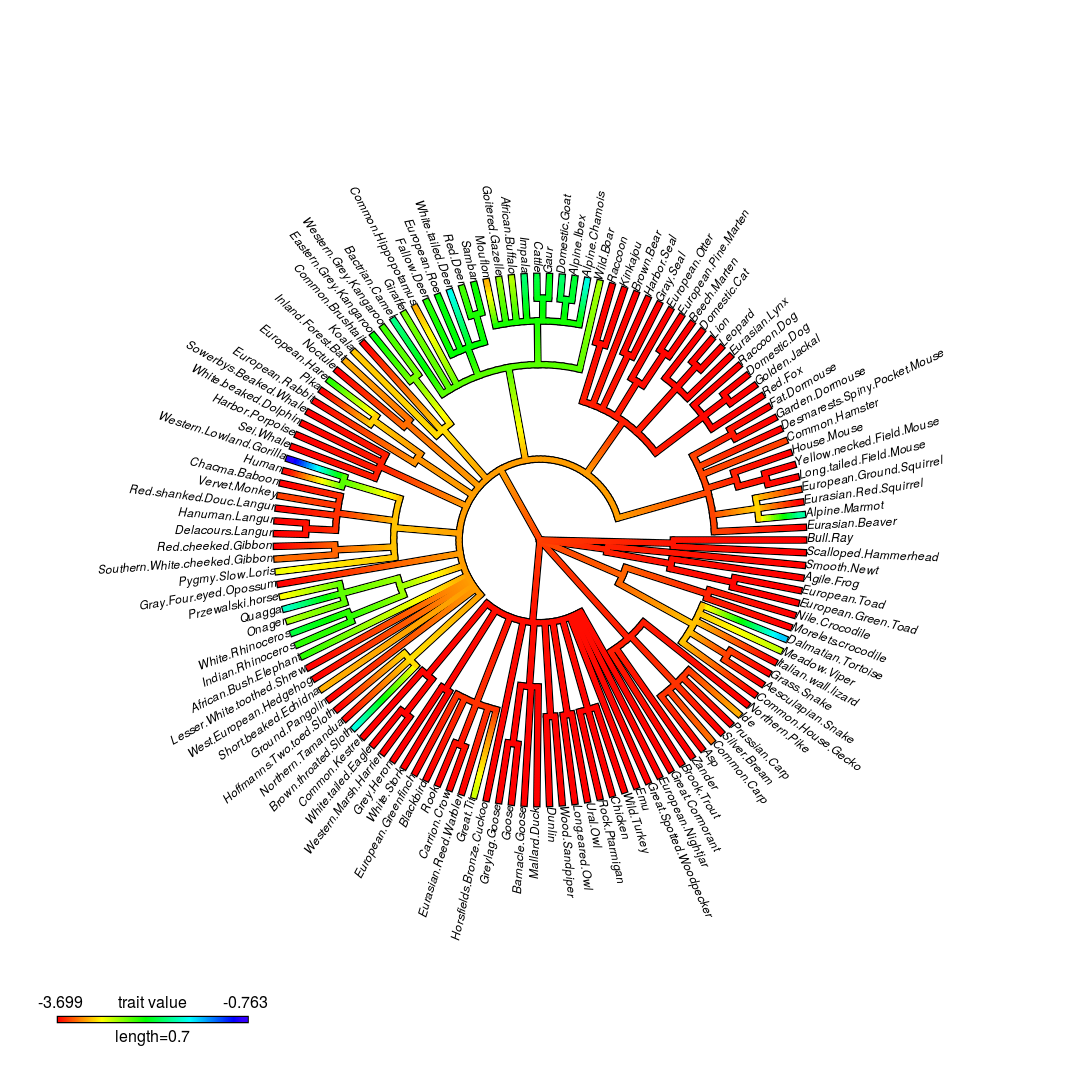

In [89]:
options(repr.plot.width=9, repr.plot.height=9)
obj = contMap(host_clado, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_clado)), fsize=c(0.6,0.8))

In [91]:
out_file = file.path(work_dir, 'contMap_methanogens.pdf')
pdf(out_file, width=10, height=10)
obj = contMap(host_clado, trait, plot=FALSE)
plot(obj, type="fan", legend=0.7*max(nodeHeights(host_clado)), fsize=c(0.6,0.8))
dev.off()
cat('File written:', out_file, '\n')

png 
  2

File written: /ebio/abt3_projects/Georg_animal_feces/data/host_specific/clado_map//contMap_methanogens.pdf 


# sessionInfo

In [90]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 16.04.3 LTS

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] phytools_0.6-00 maps_3.1.1      phyloseq_1.19.1 ape_4.1        
[5] ggplot2_2.2.1   tidyr_0.6.1     dplyr_0.5.0    

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.8             msm_1.6.4               mvtnorm_1.0-5          
 [4] lattice_0.20-34         Biostrings_2.42.1       assertthat_0.1         
 [7] digest_0.6.12           foreach_1.4.3           IRdisplay_0.4.4        
[10] R6_2.2.0  